In [181]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd 

In [182]:
df = pd.read_csv("hmnist_28_28_RGB.csv")
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


 We have 28 * 28 = 784
    
RGB have 3 channels one for R , one for G and one for B  . so 784 + 784 + 784 = 2352 , So is the size of our data 

In [183]:
df.shape

(10015, 2353)

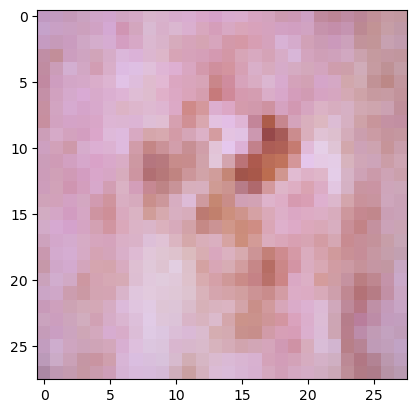

In [184]:
a = df.iloc[0, 0:2352]
arr = np.array(a)
arr_1 = arr.reshape(28, 28, 3)
plt.imshow(arr_1);

In [185]:
image_data = df.iloc[:, 0:2352].values

In [186]:
num_images = image_data.shape[0]
num_images

10015

numpy.ndarray

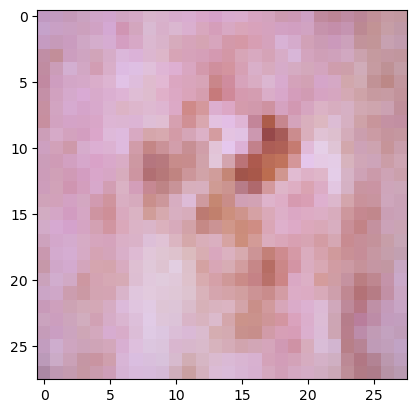

In [187]:
plt.imshow(image_data[0].reshape(28, 28, 3))
type(image_data)

In [188]:
#reshaped_data =np.reshape( image_data,(10015, 28, 28, 3))
reshaped_data = image_data.reshape(-1, 28, 28, 3)

reshaped_data

array([[[[192, 153, 193],
         [195, 155, 192],
         [197, 154, 185],
         ...,
         [193, 144, 153],
         [197, 154, 163],
         [194, 152, 160]],

        [[197, 162, 202],
         [201, 160, 197],
         [202, 160, 193],
         ...,
         [194, 147, 149],
         [198, 158, 166],
         [192, 153, 167]],

        [[197, 155, 193],
         [198, 154, 185],
         [202, 156, 191],
         ...,
         [194, 149, 152],
         [199, 161, 177],
         [194, 156, 175]],

        ...,

        [[194, 157, 191],
         [206, 173, 206],
         [206, 165, 192],
         ...,
         [191, 155, 183],
         [193, 159, 187],
         [193, 163, 197]],

        [[187, 154, 185],
         [203, 171, 199],
         [202, 161, 183],
         ...,
         [178, 131, 148],
         [187, 152, 174],
         [190, 159, 189]],

        [[171, 136, 164],
         [191, 153, 179],
         [196, 155, 176],
         ...,
         [173, 124, 138],
        

In [189]:
reshaped_data.shape

(10015, 28, 28, 3)

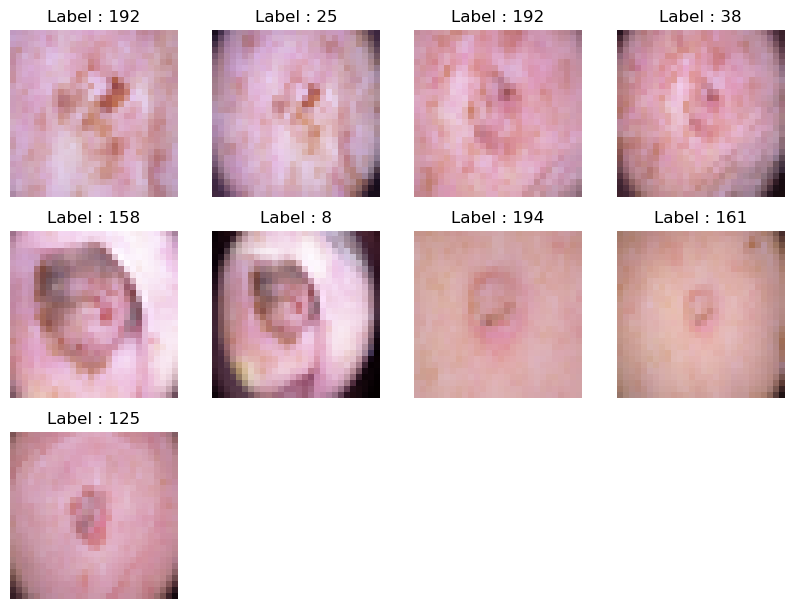

In [190]:
plt.figure(figsize=(10,10))

num_images_to_visualize = 9

for i in range(num_images_to_visualize):
    plt.subplot(4,4,i+1)
    image = reshaped_data[i]
    plt.title(f"Label : {df.iloc[i,0]}")

    plt.imshow(image)
    plt.axis('off')
plt.show()

In [191]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import time 

In [192]:
X = df.drop('label' , axis =1 )
y = df['label']

In [193]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X= pd.DataFrame(x_scaled , columns = X.columns)

In [194]:
xtrain,xtest,ytrain,ytest = train_test_split(X , y , test_size=0.3 , random_state= 25 , shuffle = True )

print(xtrain.shape , ytrain.shape)
print(xtest.shape , ytest.shape )

(7010, 2352) (7010,)
(3005, 2352) (3005,)


In [195]:
# Build a simple ANN architecture (input layer = 1 )

cnnmodel = Sequential([
    Dense(128, activation = 'relu' , input_shape=(2352, )),
    Dense(64 , activation = 'relu'),
    Dense(32, activation= 'relu'),
    Dense(7, activation= 'softmax') ])

In [196]:
cnnmodel.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [197]:
# Train the model on batchsize 8
S = time.time()
history=cnnmodel.fit(xtrain,ytrain , epochs=5, batch_size=8 , validation_data=(xtest , ytest))
E = time.time()

Epoch 1/5
877/877 [==============================] - 6s 6ms/step - loss: 0.9726 - accuracy: 0.6693 - val_loss: 0.8904 - val_accuracy: 0.6785
Epoch 2/5
877/877 [==============================] - 5s 5ms/step - loss: 0.8414 - accuracy: 0.6987 - val_loss: 0.8542 - val_accuracy: 0.6972
Epoch 3/5
877/877 [==============================] - 5s 5ms/step - loss: 0.7870 - accuracy: 0.7181 - val_loss: 0.8430 - val_accuracy: 0.6902
Epoch 4/5
877/877 [==============================] - 5s 5ms/step - loss: 0.7577 - accuracy: 0.7248 - val_loss: 0.8501 - val_accuracy: 0.6952
Epoch 5/5
877/877 [==============================] - 5s 6ms/step - loss: 0.7353 - accuracy: 0.7300 - val_loss: 0.7995 - val_accuracy: 0.7068


In [198]:
#Evaluate the model 
test_loss , test_acc = cnnmodel.evaluate(xtest , ytest)
train_loss , train_acc=cnnmodel.evaluate(xtrain, ytrain)

print(f"\n Train  Accuracy : {train_acc}") 
print(f"\n Test Accuracy : {test_acc}") 
print("\n Total time taken while training " , E-S)


220/220 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.7498

 Train  Accuracy : 0.7497860193252563

 Test Accuracy : 0.7068219780921936

 Total time taken while training  24.762394428253174


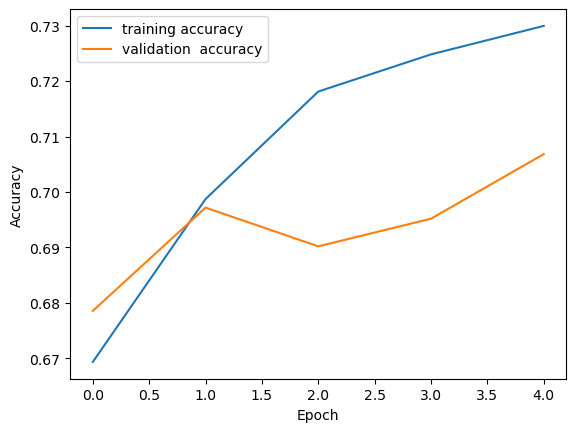

In [200]:
plt.plot(history.history['accuracy'] , label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation  accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()